# Partie sur la prediction des données

## Classification des elections du second tour 2022

### Préparation des données

In [1]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#creation du dataset
df_pourcent_chomage = pd.read_excel('../AutreDataDepartement/tauxChomage.xlsx').dropna()
df_pourcent_chomage = df_pourcent_chomage.iloc[:, [1, 2]]
df_pourcent_chomage.columns = ['Departement', 'tauxChomage']

df_niveauEtude = pd.read_excel('../AutreDataDepartement/NiveauEtudeJeune2017.xlsx', sheet_name='Figure 1a').dropna()
df_niveauEtude = df_niveauEtude.iloc[:, [1, 2]]
df_niveauEtude.columns = ['Departement', 'niveauEtude']

df_densitePop = pd.read_excel('../AutreDataDepartement/NbPopDepartement2023.xls', sheet_name='2023').dropna()
df_densitePop = df_densitePop.iloc[:, [1, 7]]
df_densitePop.columns = ['Departement', 'nbPersonne']

df_magasinBIO = pd.read_excel('../AutreDataDepartement/MagasinBio2016.xls', sheet_name='Figure 2').dropna()
df_magasinBIO.columns = ['Departement', 'Proximité']

df_PopImmigre = pd.read_excel('../AutreDataDepartement/PopImmigré.xlsx').dropna()
df_PopImmigre = df_PopImmigre.iloc[:, [1, 2]]
df_PopImmigre.columns = ['Departement', 'Immigré']

# Charger les données des résultats présidentiels
df_resultatPresidentielle = pd.read_excel('../resultats-par-niveau-subcom-t2-france-entiere.xlsx').dropna()
df_resultatPresidentielle = df_resultatPresidentielle.iloc[:, [1, 25, 32]]
df_resultatPresidentielle.columns = [ 'Departement', 'Macron', 'Lepen']
df_resultatPresidentielle = df_resultatPresidentielle.groupby('Departement')[['Macron', 'Lepen']].mean().reset_index()

df_concat = pd.merge(df_densitePop, df_resultatPresidentielle, on='Departement')
df_concat = pd.merge(df_concat, df_niveauEtude, on='Departement')
df_concat = pd.merge(df_concat, df_pourcent_chomage, on='Departement')
df_concat = pd.merge(df_concat, df_magasinBIO, on='Departement')
df_concat = pd.merge(df_concat, df_PopImmigre, on='Departement')
print(df_concat)

                Departement nbPersonne     Macron      Lepen niveauEtude  \
0                       Ain     671937  50.982366  49.017659        41.4   
1                     Aisne     522791  38.089161  61.910914        29.7   
2                    Allier     332443  48.201987  51.798013        33.4   
3   Alpes-de-Haute-Provence     166654  47.890556  52.109697        37.2   
4              Hautes-Alpes     139942  53.414383  46.585802        41.7   
..                      ...        ...        ...        ...         ...   
89    Territoire de Belfort     136891  45.499208  54.500792        43.3   
90                  Essonne    1316053  58.871340  41.128711        47.5   
91           Hauts-de-Seine    1642002  80.148611  19.851389        71.1   
92             Val-de-Marne    1426748  71.616596  28.383404        56.1   
93               Val-d'Oise    1274374  58.109402  41.890707        45.2   

    tauxChomage Proximité   Immigré  
0           5.5      1.66   79312.0  
1          

In [3]:
# Sélection des features
features = df_concat.drop(['Departement','Macron', 'Lepen'], axis=1)
y = [0 if x <= 50 else 1 for x in df_concat['Macron']]

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

#division des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#definition des labels
target_names = ['Lepen', 'Macron']

### Application de SVM, en faisant du copier coller du tp8

In [4]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Prédire sur les données de test et évaluer les performances
y_pred_linear = svm_linear.predict(X_test)
print("Performance du SVM avec un noyau linéaire :")
print(classification_report(y_test, y_pred_linear, target_names=target_names))

Performance du SVM avec un noyau linéaire :
              precision    recall  f1-score   support

       Lepen       1.00      0.67      0.80         9
      Macron       0.77      1.00      0.87        10

    accuracy                           0.84        19
   macro avg       0.88      0.83      0.83        19
weighted avg       0.88      0.84      0.84        19



In [5]:
svm_linear = SVC(kernel='poly')
svm_linear.fit(X_train, y_train)

# Prédire sur les données de test et évaluer les performances
y_pred_linear = svm_linear.predict(X_test)
print("Performance du SVM avec un noyau linéaire :")
print(classification_report(y_test, y_pred_linear, target_names=target_names))

Performance du SVM avec un noyau linéaire :
              precision    recall  f1-score   support

       Lepen       0.56      1.00      0.72         9
      Macron       1.00      0.30      0.46        10

    accuracy                           0.63        19
   macro avg       0.78      0.65      0.59        19
weighted avg       0.79      0.63      0.58        19



In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)
print("Meilleurs paramètres pour SVM:", grid_search.best_params_)
print("Performance du SVM avec les meilleurs paramètres :")
print(classification_report(y_test, y_pred_best, target_names=target_names))

Meilleurs paramètres pour SVM: {'C': 10, 'gamma': 0.1}
Performance du SVM avec les meilleurs paramètres :
              precision    recall  f1-score   support

       Lepen       0.86      0.67      0.75         9
      Macron       0.75      0.90      0.82        10

    accuracy                           0.79        19
   macro avg       0.80      0.78      0.78        19
weighted avg       0.80      0.79      0.79        19



### Application de Regression

In [7]:
# régression logistique
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

y_pred = logReg.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Lepen       0.86      0.67      0.75         9
      Macron       0.75      0.90      0.82        10

    accuracy                           0.79        19
   macro avg       0.80      0.78      0.78        19
weighted avg       0.80      0.79      0.79        19



In [8]:
# Classifier using Ridge regression
from sklearn.linear_model import RidgeClassifier

ridgeClf = RidgeClassifier()
ridgeClf.fit(X_train, y_train)

y_pred = ridgeClf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Lepen       0.88      0.78      0.82         9
      Macron       0.82      0.90      0.86        10

    accuracy                           0.84        19
   macro avg       0.85      0.84      0.84        19
weighted avg       0.85      0.84      0.84        19



In [9]:
from sklearn.linear_model import SGDClassifier
#Linear classifiers (SVM, logistic regression, etc.) with SGD training.

sgdClf = SGDClassifier()
sgdClf.fit(X_train, y_train)

y_pred = sgdClf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Lepen       0.70      0.78      0.74         9
      Macron       0.78      0.70      0.74        10

    accuracy                           0.74        19
   macro avg       0.74      0.74      0.74        19
weighted avg       0.74      0.74      0.74        19



### Application de Foret aléatoire

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Entraînement d'une forêt aléatoire
forest_model = RandomForestClassifier(n_estimators=1000, random_state=42)
forest_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_forest = forest_model.predict(X_test)

print(classification_report(y_test, y_pred_forest, target_names=target_names))

              precision    recall  f1-score   support

       Lepen       1.00      0.78      0.88         9
      Macron       0.83      1.00      0.91        10

    accuracy                           0.89        19
   macro avg       0.92      0.89      0.89        19
weighted avg       0.91      0.89      0.89        19



### Reseau de neuronne

In [11]:
import tensorflow as tf
from tensorflow.keras import optimizers, losses, callbacks
import numpy as np

X_trainNN = np.array(X_train)
y_trainNN = np.array(y_train)
X_valNN, X_testNN = train_test_split(X_test, test_size=0.5, random_state=42)
y_valNN, y_testNN = train_test_split(y_test, test_size=0.5, random_state=42)

X_valNN = np.array(X_valNN)
y_valNN = np.array(y_valNN)

X_testNN = np.array(X_testNN)
y_testNN = np.array(y_testNN)

CallBackSave = callbacks.ModelCheckpoint("best_model_classe.h5", 
                                                 monitor='val_loss', 
                                                 save_best_only=True, 
                                                 mode='min')

callbackStop = callbacks.EarlyStopping(monitor='val_loss', 
                                                  patience=70)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(features.shape[1], activation='relu'),
    tf.keras.layers.Dense(int(features.shape[1]*3/4), activation='relu'),
    tf.keras.layers.Dense(int(features.shape[1]/2), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss=losses.binary_crossentropy,
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])     

history = model.fit(X_trainNN, y_trainNN,
                    epochs=1000,validation_data=(X_valNN, y_valNN),
                    callbacks=[CallBackSave,callbackStop]
                   )


Epoch 1/1000


2024-04-20 14:56:59.700988: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


3/3 [==============================] - 0s 44ms/step - loss: 0.6696 - accuracy: 0.4933 - val_loss: 0.7599 - val_accuracy: 0.4444
Epoch 2/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.6684 - accuracy: 0.5600 - val_loss: 0.7572 - val_accuracy: 0.3333
Epoch 3/1000
3/3 [==============================] - 0s 10ms/step - loss: 0.6671 - accuracy: 0.5600 - val_loss: 0.7545 - val_accuracy: 0.3333
Epoch 4/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.6661 - accuracy: 0.5600 - val_loss: 0.7519 - val_accuracy: 0.2222
Epoch 5/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.6654 - accuracy: 0.5600 - val_loss: 0.7481 - val_accuracy: 0.2222
Epoch 6/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.6642 - accuracy: 0.5867 - val_loss: 0.7448 - val_accuracy: 0.2222
Epoch 7/1000
3/3 [==============================] - 0s 11ms/step - loss: 0.6634 - accuracy: 0.5867 - val_loss: 0.7414 - val_accuracy: 0.2222
Epoch 8/1000
3/3 [========

3/3 [==============================] - 0s 7ms/step - loss: 0.6422 - accuracy: 0.6267 - val_loss: 0.7171 - val_accuracy: 0.4444
Epoch 60/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.6419 - accuracy: 0.6267 - val_loss: 0.7171 - val_accuracy: 0.4444
Epoch 61/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.6416 - accuracy: 0.6267 - val_loss: 0.7172 - val_accuracy: 0.4444
Epoch 62/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.6412 - accuracy: 0.6267 - val_loss: 0.7173 - val_accuracy: 0.4444
Epoch 63/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.6409 - accuracy: 0.6267 - val_loss: 0.7173 - val_accuracy: 0.4444
Epoch 64/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.6406 - accuracy: 0.6400 - val_loss: 0.7174 - val_accuracy: 0.4444
Epoch 65/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.6403 - accuracy: 0.6400 - val_loss: 0.7175 - val_accuracy: 0.4444
Epoch 66/1000
3/3 [========

3/3 [==============================] - 0s 6ms/step - loss: 0.6107 - accuracy: 0.7067 - val_loss: 0.7249 - val_accuracy: 0.3333
Epoch 118/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.6100 - accuracy: 0.7067 - val_loss: 0.7240 - val_accuracy: 0.3333
Epoch 119/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.6094 - accuracy: 0.7067 - val_loss: 0.7237 - val_accuracy: 0.3333
Epoch 120/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.6090 - accuracy: 0.6933 - val_loss: 0.7238 - val_accuracy: 0.3333
Epoch 121/1000
3/3 [==============================] - 0s 7ms/step - loss: 0.6083 - accuracy: 0.6933 - val_loss: 0.7240 - val_accuracy: 0.3333
Epoch 122/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.6078 - accuracy: 0.6933 - val_loss: 0.7240 - val_accuracy: 0.3333
Epoch 123/1000
3/3 [==============================] - 0s 6ms/step - loss: 0.6072 - accuracy: 0.7067 - val_loss: 0.7241 - val_accuracy: 0.3333


In [12]:
best_model = tf.keras.models.load_model("best_model_classe.h5")

y_pred_NN = best_model.predict(X_testNN)
y_pred_binary = (y_pred_NN > 0.5).astype(int)
print(classification_report(y_testNN, y_pred_binary, target_names=target_names))

1/1 [==============================] - 0s 34ms/step
              precision    recall  f1-score   support

       Lepen       0.56      1.00      0.71         5
      Macron       1.00      0.20      0.33         5

    accuracy                           0.60        10
   macro avg       0.78      0.60      0.52        10
weighted avg       0.78      0.60      0.52        10



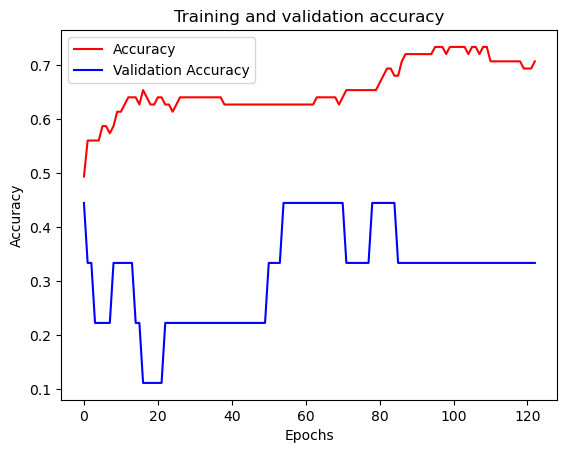

In [13]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = [*range(len(acc))]

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

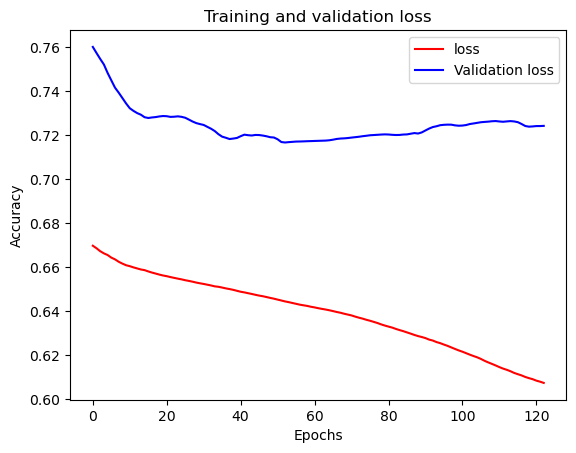

In [14]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = [*range(len(loss))]

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["loss", "Validation loss"])
plt.show()

### KNN voisin

In [15]:
from sklearn.neighbors import KNeighborsClassifier

acc=0
bestN_neighbors=1

X_valKNN, X_testKNN = train_test_split(X_test, test_size=0.5, random_state=42)
y_valKNN, y_testKNN = train_test_split(y_test, test_size=0.5, random_state=42)


for i in range (1,X_testKNN.shape[0]+1):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train, y_train)
    
    y_pred = knn_model.predict(X_valKNN)
    matriceConfusion = classification_report(y_valKNN, y_pred, output_dict=True)
    
    precision_class_0 = matriceConfusion['0']['precision']
    precision_class_1 = matriceConfusion['1']['precision']
    
    avg_precision = (precision_class_0 + precision_class_1) / 2
    
    if avg_precision > acc:
        bestN_neighbors = i
        acc = avg_precision
        
knn_model = KNeighborsClassifier(n_neighbors=bestN_neighbors)
knn_model.fit(X_train, y_train)
    
y_pred = knn_model.predict(X_testKNN)
print(classification_report(y_testKNN, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       Lepen       0.80      0.80      0.80         5
      Macron       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10

